# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Programming Task 2

## Student Id: 21046899<span style="color: yellowgreen"></span>

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [3]:
# add code here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# line for captioning output

def caption(text):
  width = max(4+len(text), 70) # width of the line --4: tab size, 70: default width
  line = '\n' + '-'* width
  print(line + '\n' + str(text).center(width) + line)
  

# read first file
df1 = pd.read_csv('task2a.csv')
caption('summary of task2a.csv')
df1.info()

# read second file
df2 = pd.read_csv('task2b.csv')
caption('summary of task2b.csv')
df2.info()

# merge both files into a single dataframe
merged_df = pd.merge(df1, df2, on='region', left_index=False, right_index=False)
caption('summary of the merged dataframe')
merged_df.info()


----------------------------------------------------------------------
                        summary of task2a.csv                         
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    51 non-null     int64  
 1   median_household_income                   51 non-null     int64  
 2   share_unemployed_seasonal                 51 non-null     float64
 3   share_population_in_metro_areas           51 non-null     float64
 4   share_population_with_high_school_degree  51 non-null     float64
 5   share_non_citizen                         48 non-null     float64
 6   share_white_poverty                       51 non-null     float64
 7   gini_index                             

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [4]:
# remove entries with missing columns
merged_df = merged_df.dropna()

# remove 'share_voters_voted_to_the_right' column
merged_df = merged_df.drop('share_voters_voted_to_the_right', axis=1)

caption('Summary of cleaned data')
merged_df.info()


----------------------------------------------------------------------
                       Summary of cleaned data                        
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   region                                    47 non-null     int64  
 1   median_household_income                   47 non-null     int64  
 2   share_unemployed_seasonal                 47 non-null     float64
 3   share_population_in_metro_areas           47 non-null     float64
 4   share_population_with_high_school_degree  47 non-null     float64
 5   share_non_citizen                         47 non-null     float64
 6   share_white_poverty                       47 non-null     float64
 7   gini_index                             

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the effects of household income on levels of bias crimes


----------------------------------------------------------------------
                            sample of data                            
----------------------------------------------------------------------


,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,avg_biascrimes_per_100k
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,2.397986



----------------------------------------------------------------------
                           data statistics                            
----------------------------------------------------------------------


,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,avg_biascrimes_per_100k
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,26.106383,55423.340426,0.050085,0.765957,0.868426,0.054043,0.090851,0.454511,0.310426,2.379352
std,15.151746,8817.840427,0.010523,0.177233,0.033165,0.031184,0.024122,0.021235,0.149389,1.744572
min,1.000000,39552.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.266941
25%,13.500000,48657.000000,0.042500,0.640000,0.840500,0.030000,0.075000,0.440000,0.200000,1.303706
50%,27.000000,55173.000000,0.051000,0.800000,0.874000,0.040000,0.090000,0.455000,0.280000,1.937083
75%,38.500000,60719.000000,0.057500,0.900000,0.897000,0.080000,0.100000,0.466500,0.420000,3.168247
max,51.000000,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.630000,10.953480



----------------------------------------------------------------------
                             data heatmap                             
----------------------------------------------------------------------


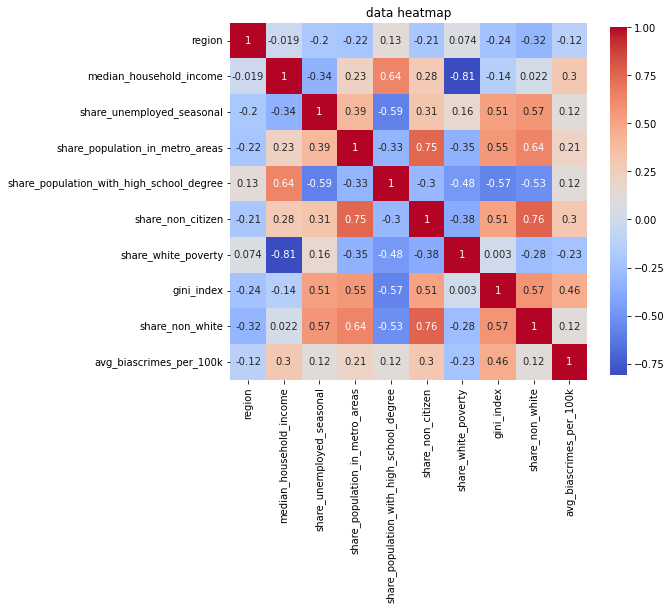

In [5]:
# peep data
caption('sample of data')
display(merged_df.head(5))

# check data statistics
caption('data statistics')
display(merged_df.describe())

# generate correlation heatmap for entire data
plt.figure(figsize=(8,8))
caption('data heatmap')
sns.heatmap(
  merged_df.corr(), 
  annot=True, 
  cmap=plt.cm.coolwarm, 
  square=True, 
  cbar_kws={"shrink": .8},
)
plt.title('data heatmap')
plt.show()



----------------------------------------------------------------------
             Correlation: household income vs biascrimes              
----------------------------------------------------------------------


,median_household_income,avg_biascrimes_per_100k
median_household_income,1.000000,0.295819
avg_biascrimes_per_100k,0.295819,1.000000



----------------------------------------------------------------------
                          Exploratory graphs                          
----------------------------------------------------------------------


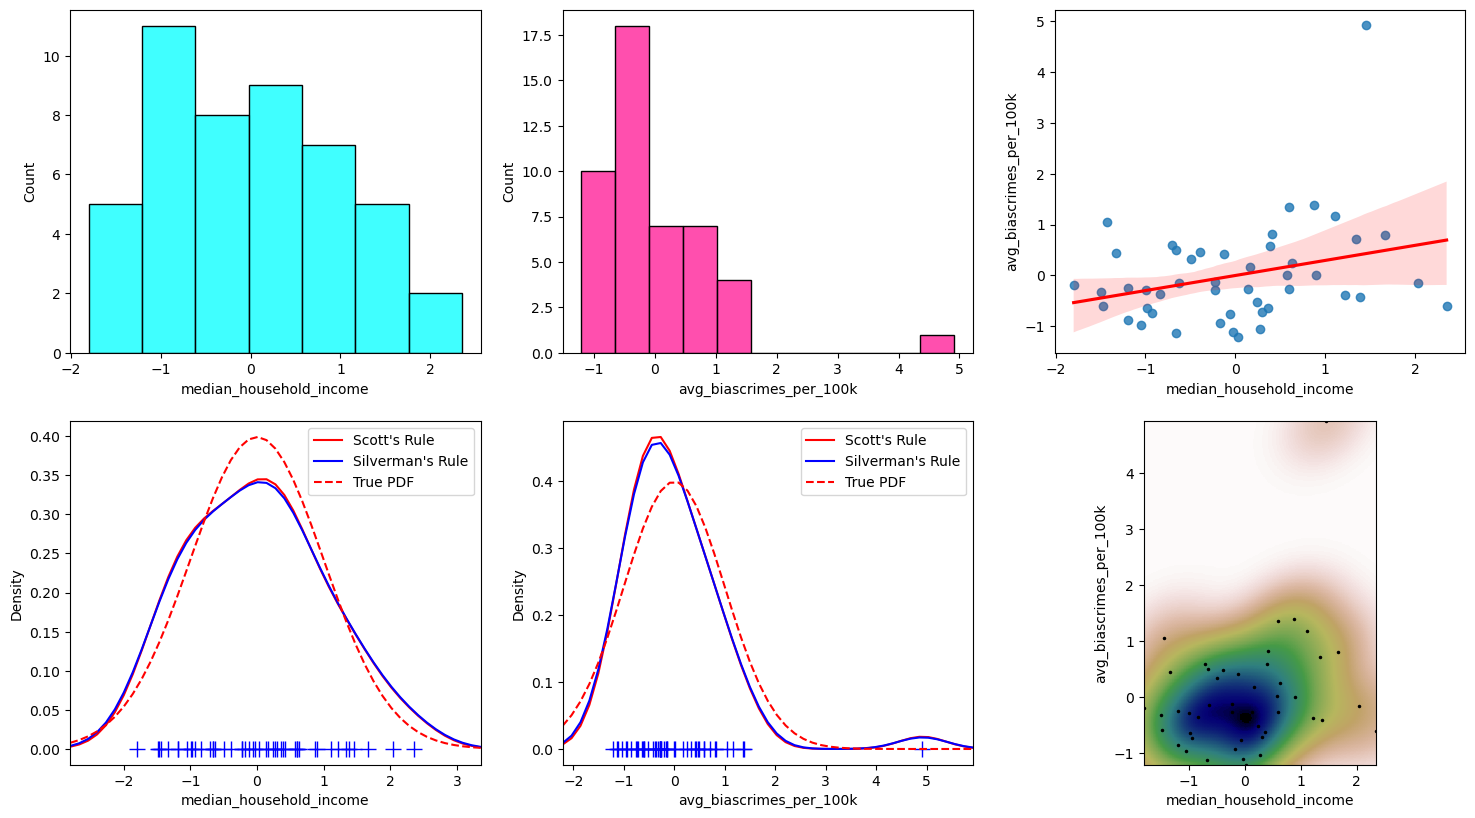

In [6]:
# Define functions to be used for the investigation ================================================================================
def characteristic_plots(x1, x2):
  '''
  this function takes values for two measures and  generates their distribution(histogram)
  plots, scatter plot with line of regression, gaussian kernel distribution plots, and a 
  color map for the gaussian kernel estimation for the two measures
  Input:
    @params x1, x2: the measures to be evaluated as numpy arrays of pandas series
  Output:
    @returns: None  
    prints a figure with titled suplots of the diagrams specified 
  '''
  # check data type compatibility of inputs
  assert \
    all( # check if either input is numpy array or pandas series
      x is np.ndarray or x is pd.core.series.Series
      for x in (type(x1), type(x2))
    ) and all( # check the validity of their data types
      x.dtype == 'int64' or x.dtype == 'float64'
      for x in (x1, x2)
    ), "input should be numpy array or pandas series with float or int values"


  #---- helper functions ----------------------------------------------------------------------------
  
  def kdeplot(x, ax):
    '''
    This function plots the gausian kernel distribution of the values passed to it
    Input:
      @param x: a numpy array or pandas series with dtype float or int
      @param ax: pyplot axis
    Output:
      @returns None
      plots the gaussian kernel distribution on the given axis
    '''
    xs = np.linspace(x.min()-1, x.max()+1, x.size)   # get lineax axis points for the plot
    
    kde1 = stats.gaussian_kde(x)                        # Scott's kde
    kde2 = stats.gaussian_kde(x, bw_method='silverman') # Silverman kde

    ax.plot(x, np.zeros(x.shape), 'b+', ms=12)                # rug plot
    ax.plot(xs, kde1(xs), 'r-', label="Scott's Rule")         # Scott's kde plot
    ax.plot(xs, kde2(xs), 'b-', label="Silverman's Rule")     # Silverman kde plot
    ax.plot(xs, stats.norm.pdf(xs), 'r--', label="True PDF")  # normal pdf plot

    # set axis labels, legend position and title
    ax.set_xlim([xs.min(), xs.max()])
    ax.set_xlabel(x.name)
    ax.set_ylabel('Density')
    ax.legend()
    # ax.title = f'gaussian kernel distribution for {x.name}'
  
  def colormap(x1, x2, ax):
    '''
    This function plots a colormap for the gaussian estimation of two measures
    Input:
      @params x1, x2: numpy arrays or pandas series with dtypes float or int
      @param ax: pyplot axis
    Output:
      @returns None
      plots a bivariate gaussian estimation colormap on the axis given 
    '''
    # grab max and min data points
    x1min, x1max = x1.min(), x1.max()
    x2min, x2max = x2.min(), x2.max()

    # prepare data points for multivariate estimation
    X1, X2 = np.mgrid[x1min:x1max:100j, x2min:x2max:100j]
    positions = np.vstack([X1.ravel(), X2.ravel()])
    values = np.vstack([x1, x2])

    # determine the multivariate gausian estimation
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel.evaluate(positions).T, X1.shape)

    # plot data points on top of colormap for the estimation 
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[x1min, x1max, x2min, x2max]) # color map
    ax.plot(x1, x2, 'k.', markersize=3)  # data points

    # set axis limits on colormap
    ax.set_xlim([x1min, x1max])
    ax.set_ylim([x2min, x2max])

    # set axis names
    ax.set_xlabel(x1.name)
    ax.set_ylabel(x2.name)

    # set colormap title
    # ax.title = f'colormap: {x1.name} vs {x2.name}'
  
  #----- end of helper definitions----------------------------------------------------------------------
  
  # define figure and sublot grid
  f, ax = plt.subplots(2, 3, figsize=(18, 10), sharey=False, dpi=100)

  # distribution plots
  sns.histplot(x1, color='cyan', ax=ax[0][0])      # distribution of x1
  sns.histplot(x2, color='deeppink', ax=ax[0][1])  # distribution of x2
  # scatter plot (x1:x2) with regression line fit
  sns.regplot(x=x1, y=x2, line_kws={"color": "red"}, ax = ax[0][2])

  # gausian kernel density plots and colormap
  kdeplot(x1, ax[1][0])
  kdeplot(x2, ax[1][1])
  colormap(x1, x2, ax[1][2])

  # plot figure with all subplots
  plt.show()

# define standardization method for data points
standardize = lambda x: (x-x.mean()) / x.std()

# Now the investigation ===============================================================================================================

# generate pearson's correlation coefficient matrix for measures under review
corr_matrix = merged_df[['median_household_income', 'avg_biascrimes_per_100k']].corr()
caption('Correlation: household income vs biascrimes')
display(corr_matrix)

# obtain and standardize data points
x1 = standardize(merged_df['median_household_income'])
x2 = standardize(merged_df['avg_biascrimes_per_100k'])

# plot data point characteristics
caption('Exploratory graphs')
characteristic_plots(x1, x2)

INTERPRETATIONS:

1. The average bias crime is positively skewed, as the histogram shows that the data is not symetric. However, the histogram for the median household income is relatively symetric.

2. The average bias crime shows positive kurtosis, with heavier tails and sharper peak. Indicating the data is not normally disributed. Compared to the average bias crime, the median household income is alot closer to a kurtosis value of zero, indicating that the data is someworth normally distributed.

3. There is a 0.295819 correlation between  median household income and the level of bias crime. (Using their correlation coefficients)

4. Correlation mesaures the relationship between two variables and as expressed by the low coefficient, median household income does not particularly determine the average bias crime that happenes.

5. From the scatter plot using a regression line, it clearly shows that our data points are dispersed, even though there is a slight or low positive correlation, but with one obvious outlier showing. 



<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Test the hypothesis that household income has no effect on levels of bias crime

In [7]:
# Define function to be used for the hypothesis testing============================================================================
def test_hypothesis(x1, x2, H0, H1, alpha=0.05, method='pearson'):
  '''
  This function performs a correlation test on input data and rejects or accepts
  the given null hypothesis by comparing the obtained p_value from the test to the 
  given significance value
  Inputs:
    @params x1, x2: numpy arrays or pandas series with dtypes float or int for the \
      measures to be evaluated
    @param H0, H1, the null and alternative hypothesis respectively
    @param alpha: the significance level, default is 0.05
    @param method: the kind of correlation test to perform, default is the Pearson's \
      Correlation Coefficient. Acceptable values are 'pearson', 'spearman' and 'kendall'
  Output:
    @return None
    prints either null or alternative hypothesis to console. The null hypothesis is
    printed if it is not rejected and vice versa
  '''
  # define correlation test method to be used
  corr = {
    'pearson': lambda x1, x2: stats.pearsonr(x1, x2),     # Pearson's Correlation Coefficient
    'spearman': lambda x1, x2: stats.spearmanr(x1, x2),   # Spearman's Rank Correlation
    'kendall': lambda x1, x2: stats.kendalltau(x1, x2)    # Kendall's Rank Correlation
  }

  # check for the validity of input method
  assert method in corr.keys(), "method should be one of 'pearson', 'spearman' or 'kendall'"

  # calculate p_value
  stat, p = corr[method](x1, x2)
  # compare p_value to significance level
  if p > alpha:
    print(H0) # Null hypothesis not rejected
  else:
    print(H1) # Null hypothesis rejected

# Test the hypothesis ===============================================================================================================

# Define null and alternative hypotheses
H0 = "there is no relationship between household income and  levels of bias crime."
H1 = 'there is a relationship between household income and  levels of bias crime.'   

# Test for correlation using pearsons Correlation coefficient
caption(f'test for the hypothesis: {H0}')
test_hypothesis(x1, x2, H0, H1, method='pearson') 


---------------------------------------------------------------------------------------------------------
  test for the hypothesis: there is no relationship between household income and  levels of bias crime.  
---------------------------------------------------------------------------------------------------------
there is a relationship between household income and  levels of bias crime.


Although slightly dependent, there is some relationship between household income and levels of bias crime, hence our null hypothesis is rejected, and our alternative hypothesis is accepted.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of urbanisation on levels of bias crimes


----------------------------------------------------------------------
               correlation: urbanization vs biascrimes                
----------------------------------------------------------------------


,share_population_in_metro_areas,avg_biascrimes_per_100k
share_population_in_metro_areas,1.000000,0.209463
avg_biascrimes_per_100k,0.209463,1.000000



----------------------------------------------------------------------
                          Exploratory graphs                          
----------------------------------------------------------------------


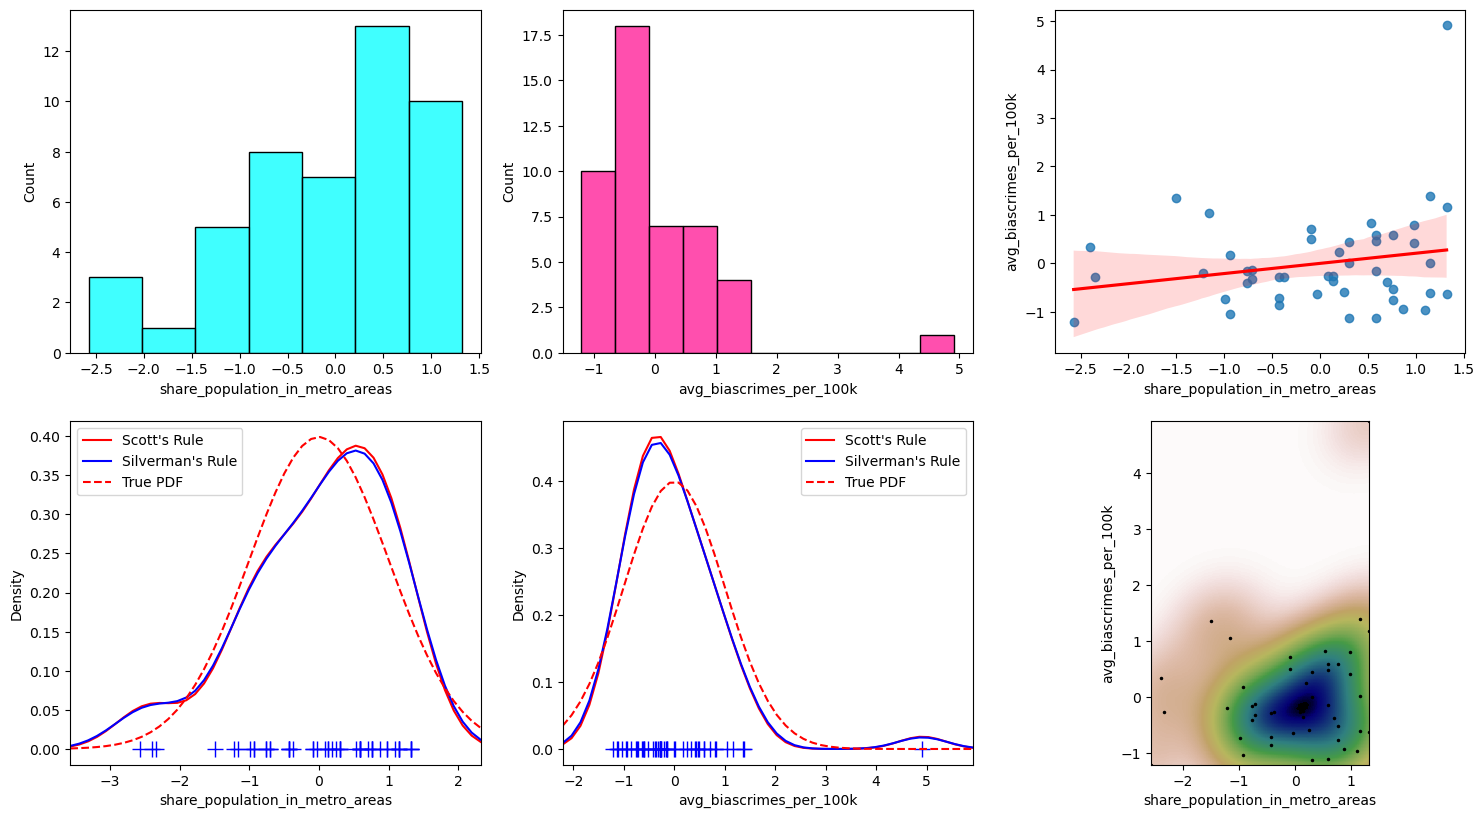

In [8]:
# generate pearson's correlation coefficient matrix for measures under review
caption('correlation: urbanization vs biascrimes')
corr_matrix = merged_df[['share_population_in_metro_areas', 'avg_biascrimes_per_100k']].corr()
display(corr_matrix)

# obtain and standardize data points
x11 = standardize(merged_df.share_population_in_metro_areas)
x2 = standardize(merged_df.avg_biascrimes_per_100k) # already obtained above

 #plot data point characteristics
caption('Exploratory graphs')
characteristic_plots(x11, x2)

1. As earlier seen average bias crime is positively skewed, while the histogram shows that the data is not symetric. However, the histogram for the share_population_in_metro_areas is negatively skewed, indicating both data variables are not symmetric.

2. The average bias crime shows positive kurtosis, with heavier tails and sharper peak. Indicating the data is not normally distributed. Compared to the average bias crime, the share_population_in_metro_areas shows a negative kurtosis, indicating that the data with flatter peak is not normally distributed.

3. There is a 0.209463 correlation between share_population_in_metro_areas and the average_bias_crime. (Using their correlation coefficients) The positive correlation in this graph is 0.2, which is close to 0. It's a weak linear relationship, as you can see from the scatterplot. Avg_bias_crimes_per_100k tend to drop when the share_population_in_metro_areas decreases.

4. Correlation measures the relationship between two variables and as expressed by the low coefficient, share_population_in_metro_areas does not particularly determine the average_bias_crime.

5. From the scatter plot using a regression line, shows almost no correlation, it clearly shows that our data points are dispersed, even though there is  a very low positive correlation, but has one obvious outlier showing. It is clear from the above scatterplot that avg_biascrimes_per_100k increases as share_population_in_metro_areas grow. The ratio is quite low but enough to conclude that both are correlated with each other in positive figures and very close to zero.




<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that urbanisation has a significant effect on levels of bias crimes

In [16]:
# define null and alternative hypotheses
H0 = 'there is no relationship between urbanisation on levels of bias crimes and the level of bias crime'
H1 = 'there is a relationship between urbanisation on levels of bias crimes and the level of bias crime'

# test hypothesis using pearsons correlation
caption(f'test for the hypothesis: {H0}')
test_hypothesis(x11, x2, H0, H1, method='pearson') 


-------------------------------------------------------------------------------------------------------------------------------
  test for the hypothesis: there is no relationship between urbanisation on levels of bias crimes and the level of bias crime  
-------------------------------------------------------------------------------------------------------------------------------
there is no relationship between urbanisation on levels of bias crimes and the level of bias crime


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


## How much work is completed?

Everything is completed with the explanation of the data and helps understand the problems and their solutions with a visual representations along with it. 

Carrying out statistical analysis with python and its external libraries was great and challenging as well.


## Problems Faced?

The kind of exploratory graphs to use for carrying out the tests and finding relationships use a very daunting choice but most of my interpretation was centered on the correlation coefficients as well as the scatterplots even though I did the gausssian kernel distribution which in itself uses mean variances to calculate a variables density. 

## Solutions

Settling on scatterplots and pearsons correlation gave me a much clearer picture of how to interpret my hypothesis as well the correlation coefficient with a lot of research as well. 

## Experience/ Learning Outcomes

Working with python's external mathematical and statistical libraries, enlightened me on what we could use python to do analytically. This is something I look forward to explore more going forward. 


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>